In [ ]:
!wget 'https://wallpaperbat.com/img/592709-colorful-animals-lion-wallpaper-hd-desktop-and-mobile-background.jpg'

--2025-09-01 10:56:53--  https://wallpaperbat.com/img/592709-colorful-animals-lion-wallpaper-hd-desktop-and-mobile-background.jpg
Resolving wallpaperbat.com (wallpaperbat.com)... 142.4.219.131
Connecting to wallpaperbat.com (wallpaperbat.com)|142.4.219.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347968 (340K) [image/jpeg]
Saving to: ‘592709-colorful-animals-lion-wallpaper-hd-desktop-and-mobile-background.jpg’

592709-colorful-ani 100%[===================>] 339.81K  --.-KB/s    in 0.06s   

2025-09-01 10:56:53 (5.44 MB/s) - ‘592709-colorful-animals-lion-wallpaper-hd-desktop-and-mobile-background.jpg’ saved [347968/347968]



In [ ]:
#importing the image module from matplotlib library
import matplotlib.image as mpimg
import matplotlib.pyplot as plt #inorder ro plot grapghs and stuff

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# Open the image.
img = cv2.imread("/content/592709-colorful-animals-lion-wallpaper-hd-desktop-and-mobile-background.jpg")
cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

# Load image
img = cv2.imread("/content/592709-colorful-animals-lion-wallpaper-hd-desktop-and-mobile-background.jpg")

if img is None:
    print("Error: Image not found or unable to load.")
else:
    # Get the dimensions of the image
    dimensions = img.shape
    height, width, channels = dimensions

    # Show image in Colab
    cv2_imshow(img)

    # Print dimensions
    print("Image Dimension: {} x {} pixels with {} channels".format(width, height, channels))
    print("Image Dimension (H, W, C): {}".format(dimensions))


Output hidden; open in https://colab.research.google.com to view.

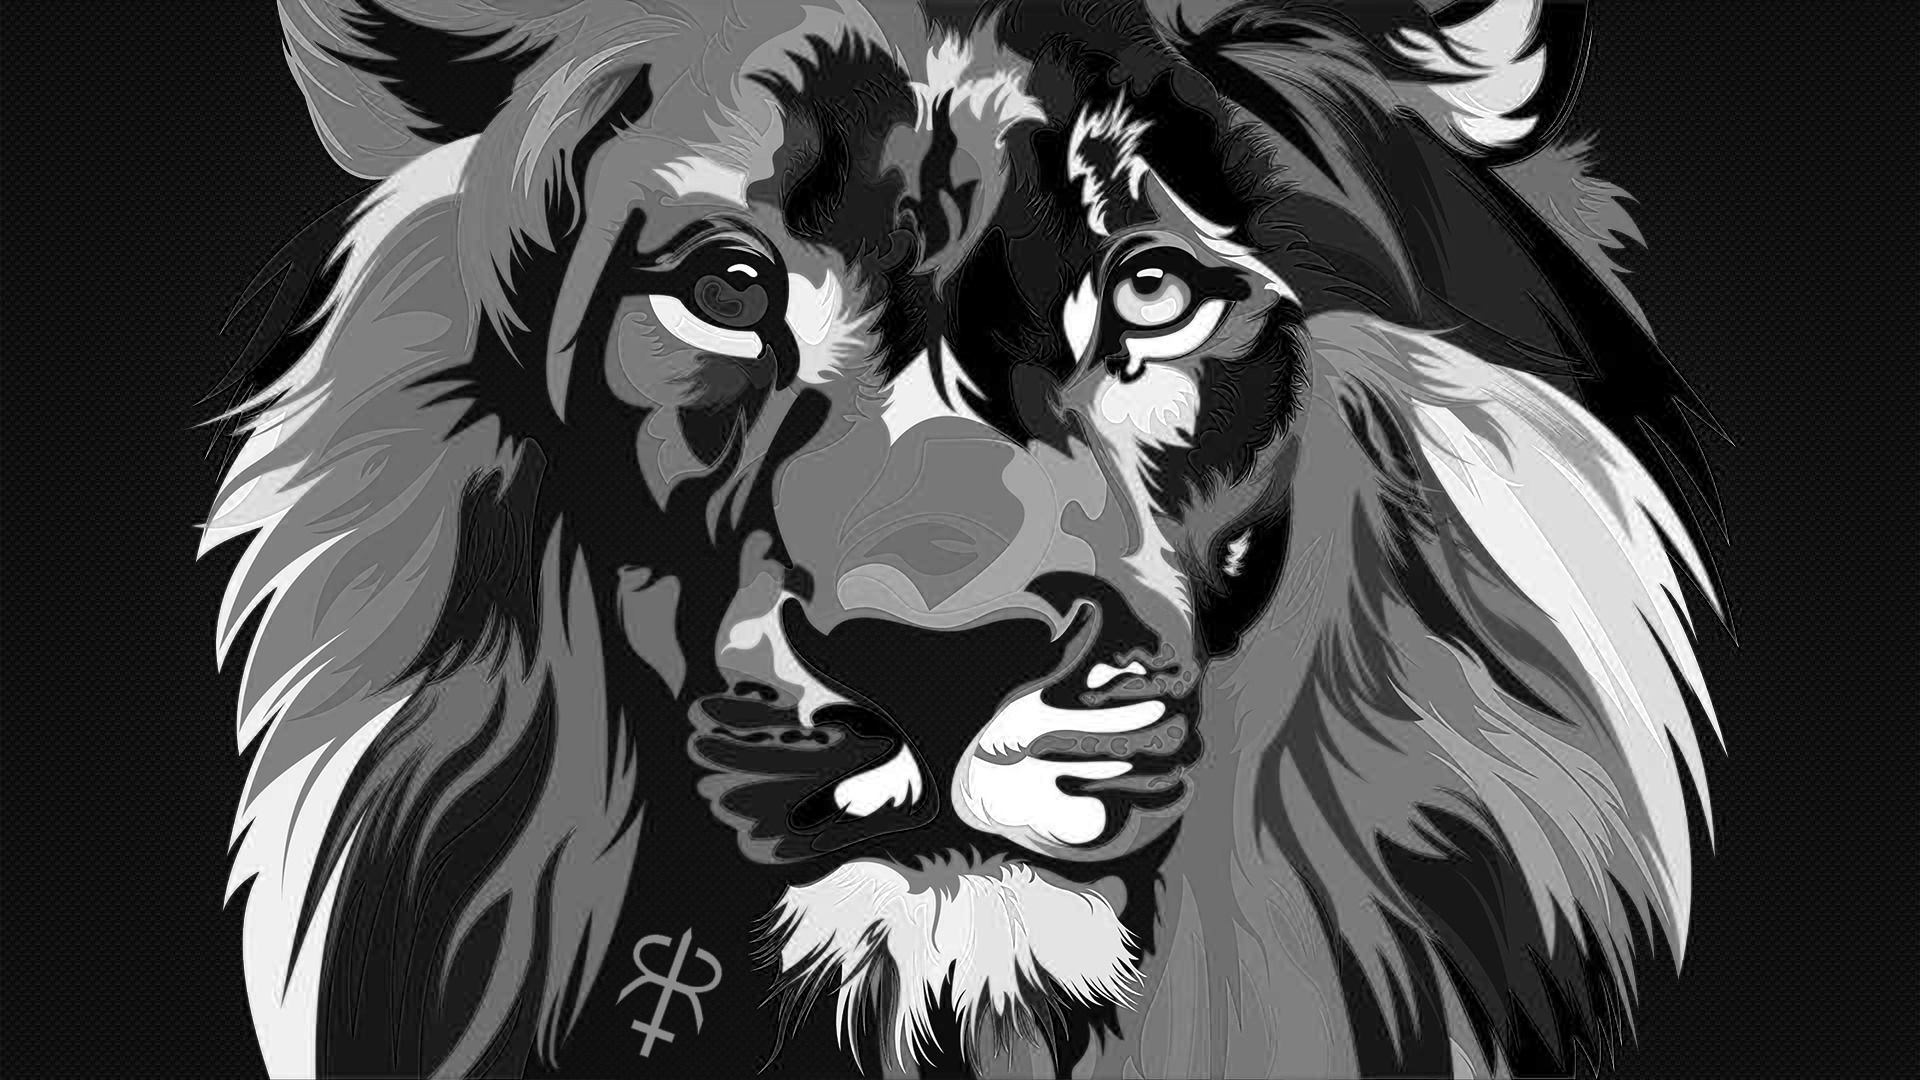

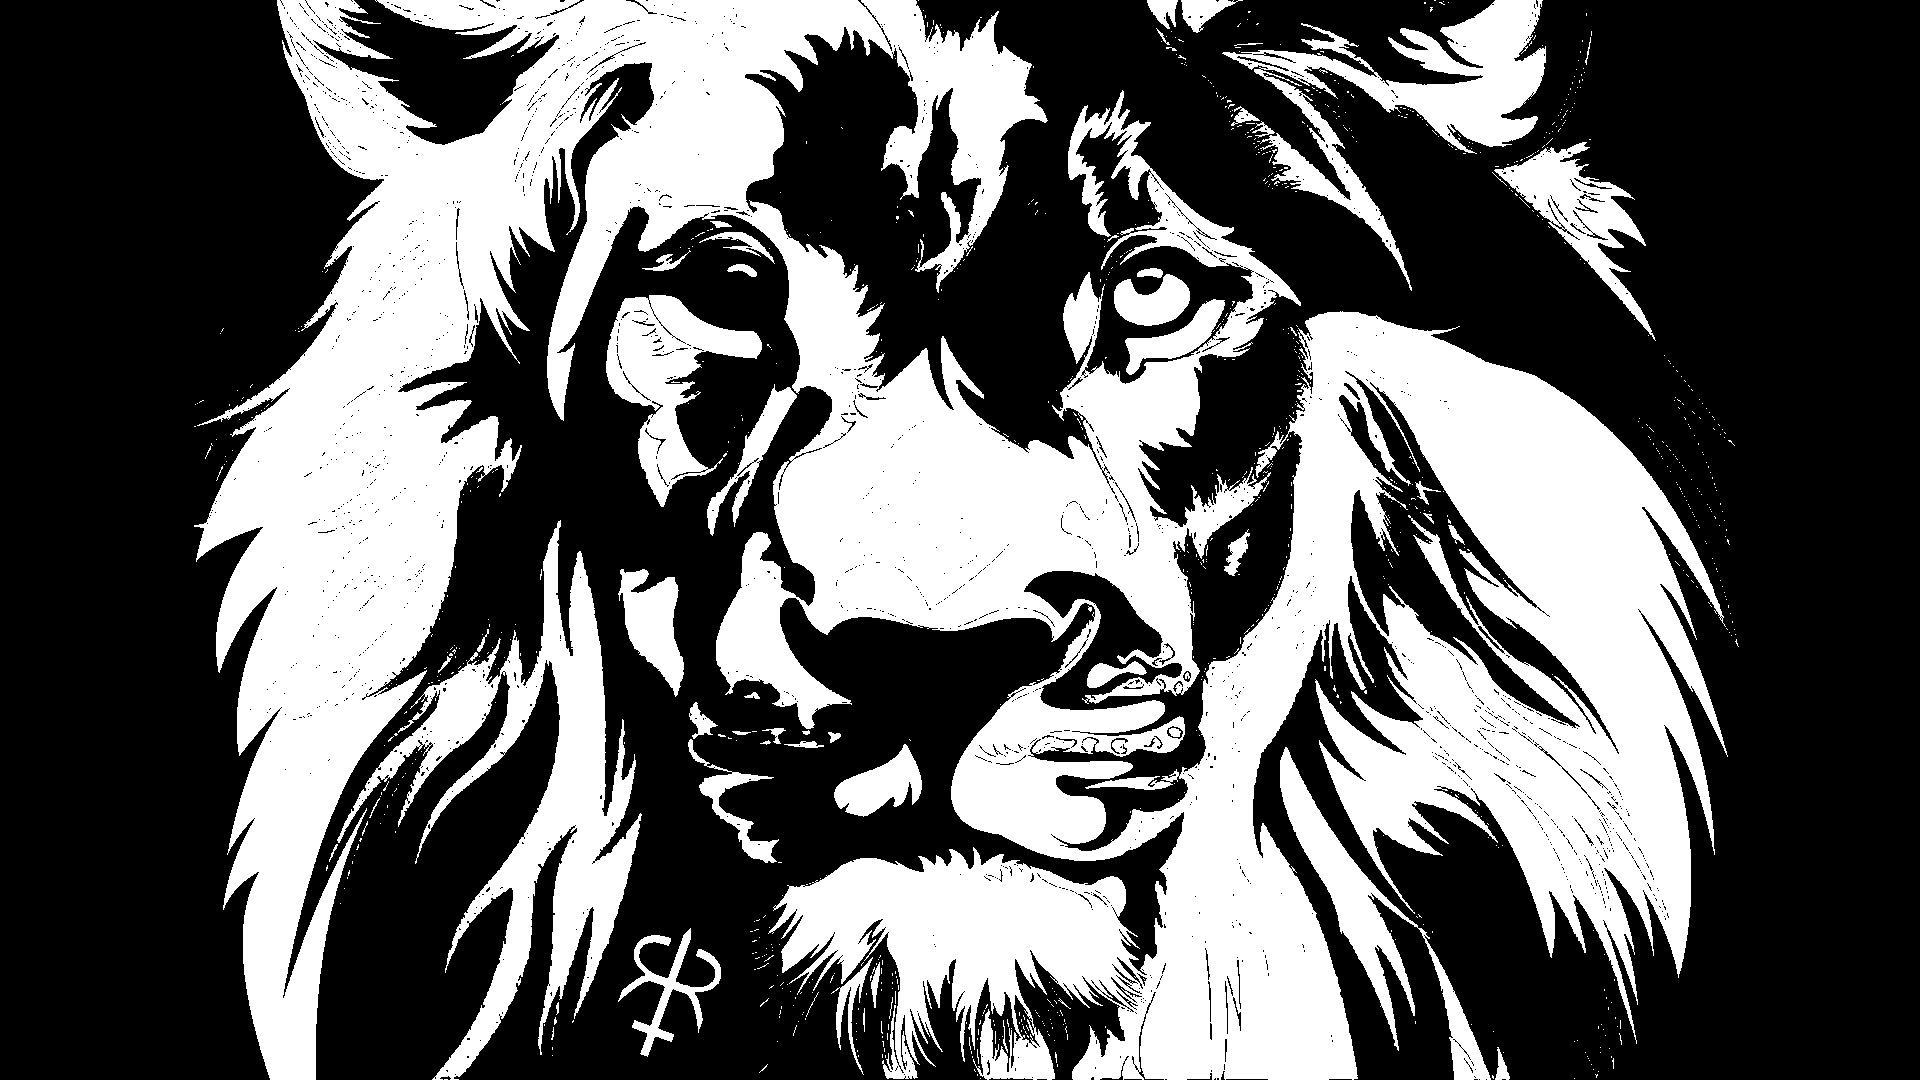

In [9]:
# to convet the colored image to grey and white
img1 = img[:,:,0]
cv2_imshow(img1)
#thresholding for finding the needed part of the image
for i in range(img1.shape[0]):
  for j in range(img1.shape[1]):
    if img1[i,j] < 100:
      img1[i,j] = 0
    else:
      img1[i,j] = 255
cv2_imshow(img1)

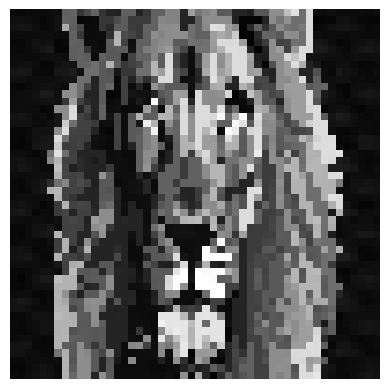

In [10]:
#image pixelising
image=cv2.imread("/content/592709-colorful-animals-lion-wallpaper-hd-desktop-and-mobile-background.jpg",cv2.IMREAD_GRAYSCALE)
image_50x50=cv2.resize(image,(50,50))
plt.imshow(image_50x50,cmap='gray'),plt.axis("off")
plt.show()

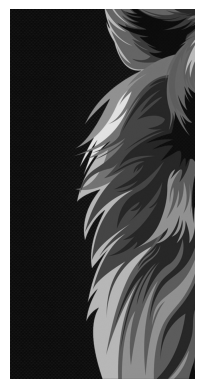

In [11]:
#printing the images with all the rows and half the columns
image=cv2.imread("/content/592709-colorful-animals-lion-wallpaper-hd-desktop-and-mobile-background.jpg",cv2.IMREAD_GRAYSCALE)
image_cropped=image[:,:540]
plt.imshow(image_cropped,cmap='gray'),plt.axis("off")
plt.show()

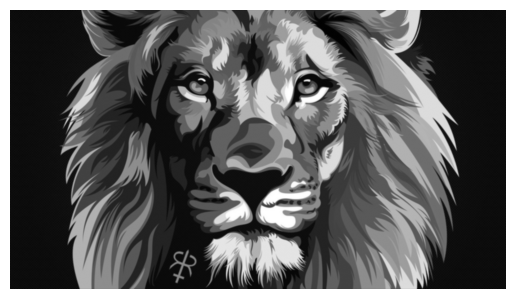

In [12]:
#blurring the with the kernel of 5x5
image=cv2.imread("/content/592709-colorful-animals-lion-wallpaper-hd-desktop-and-mobile-background.jpg",cv2.IMREAD_GRAYSCALE)
image_blur=cv2.blur(image,(5,5))
plt.imshow(image_blur,cmap='gray'),plt.axis("off")
plt.show()

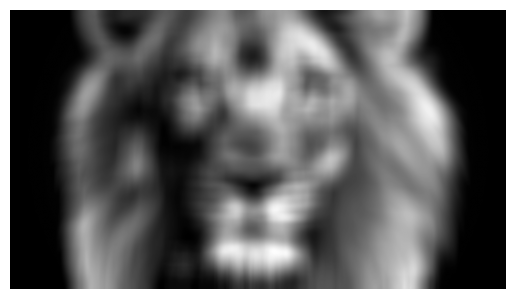

In [13]:
#blurring the image
image_very_blurry=cv2.blur(image,(100,100))
plt.imshow(image_very_blurry,cmap='gray'),plt.axis("off")
plt.show()

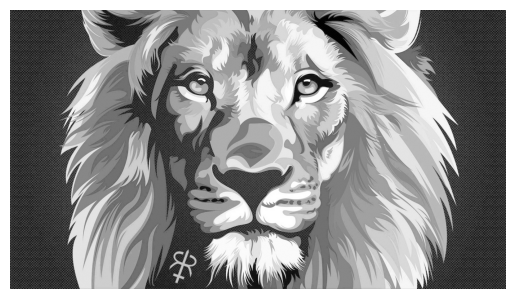

In [14]:
image=cv2.imread("/content/592709-colorful-animals-lion-wallpaper-hd-desktop-and-mobile-background.jpg",cv2.IMREAD_GRAYSCALE)
#enhance image
image_enhanced=cv2.equalizeHist(image)
#show image
plt.imshow(image_enhanced,cmap='gray'),plt.axis("off")
plt.show()

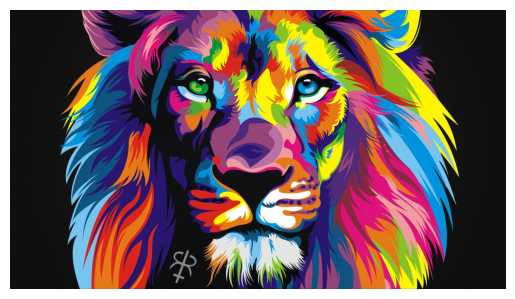

In [15]:
#convert the black and white to color image
image_bgr=cv2.imread("/content/592709-colorful-animals-lion-wallpaper-hd-desktop-and-mobile-background.jpg")
image_rgb=cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb),plt.axis("off")
plt.show()

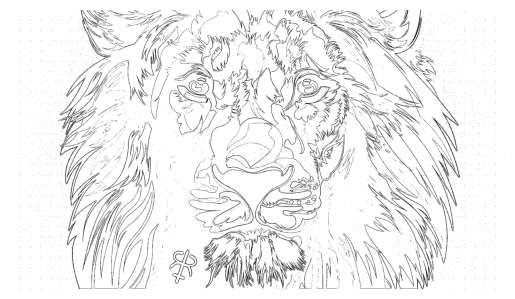

In [16]:
#for a scaled mean image
image_grey=cv2.imread("/content/592709-colorful-animals-lion-wallpaper-hd-desktop-and-mobile-background.jpg",cv2.IMREAD_GRAYSCALE)
max_output_value=255
neighbourhood_size=7
subtract_from_mean=10
image_clahe=cv2.adaptiveThreshold(image_grey,max_output_value,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,neighbourhood_size,subtract_from_mean)
plt.imshow(image_clahe,cmap='gray'),plt.axis("off")
plt.show()

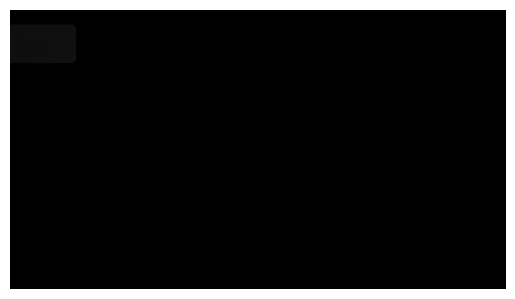

In [17]:
#removing the backgrounds
image_bgr=cv2.imread("/content/592709-colorful-animals-lion-wallpaper-hd-desktop-and-mobile-background.jpg")
image_hsv=cv2.cvtColor(image_bgr,cv2.COLOR_BGR2HSV)
#rectangular values start x,start y,width,height
rectangle=(0,56,256,150)
#initial masking
mask=np.zeros(image_bgr.shape[:2],np.uint8)
#create temparary arrays used by the grabcut
bgdModel=np.zeros((1,65),np.float64)
fgdModel=np.zeros((1,65),np.float64)
#grabcut
cv2.grabCut(image_bgr,mask,rectangle,bgdModel#temparary array for background
            ,fgdModel#temparary array for background
            ,5 #number of iterations
            ,cv2.GC_INIT_WITH_RECT)#initiative using our rectangle
mask2=np.where((mask==2)|(mask==0),0,1).astype('uint8')
#multiply with the mask to separate the background
image_bgr_masked=image_bgr*mask2[:,:,np.newaxis]
plt.imshow(image_bgr_masked),plt.axis("off")
plt.show()

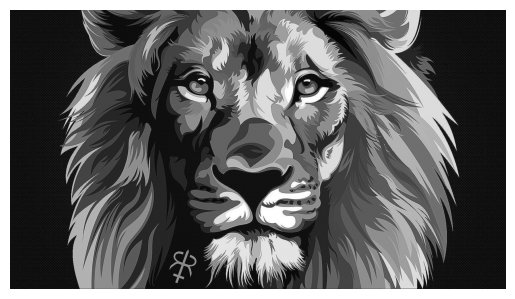

In [18]:
#sharpening the image
image=cv2.imread("/content/592709-colorful-animals-lion-wallpaper-hd-desktop-and-mobile-background.jpg",cv2.IMREAD_GRAYSCALE)
kernal=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
image_sharpened=cv2.filter2D(image,-1,kernal)
plt.imshow(image_sharpened,cmap='gray'),plt.axis("off")
plt.show()